In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants
import os
import my_library.gluex_style

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
os.nice(18)

18

In [3]:
mc_path_pipkmks = '/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_bestX2_2018_spring_loose_chi2.root'
data_path_pipkmks = '/work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_bestX2_2018_spring_loose_chi2.root'

tree_data_pipkmks = 'pipkmks__B4_M16'
tree_mc_pipkmks = 'pipkmks__ks_pippim__B4_M16'

df_data_pipkmks = ROOT.RDataFrame(tree_data_pipkmks, data_path_pipkmks)
df_mc_pipkmks = ROOT.RDataFrame(tree_mc_pipkmks, mc_path_pipkmks)

In [4]:
df_data_pipkmks = tools.define_pipkmks_columns(df_data_pipkmks)
df_data_pipkmks = df_data_pipkmks.Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.P_P_CUT)

df_mc_pipkmks = tools.define_pipkmks_columns(df_mc_pipkmks)
df_mc_pipkmks = df_mc_pipkmks.Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.P_P_CUT)

In [5]:
hist_chi2_data_pipkmks = df_data_pipkmks.Filter('pipkmks_m < 1.5').Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Histo1D(('chi2', 'chi2', 100, 0, 10), 'chi2ndf')
hist_chi2_mc_pipkmks = df_mc_pipkmks.Filter('pipkmks_m < 1.5').Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Histo1D(('chi2', 'chi2', 100, 0, 10), 'chi2ndf')

In [6]:
c = ROOT.TCanvas('c', 'c', 800, 600)

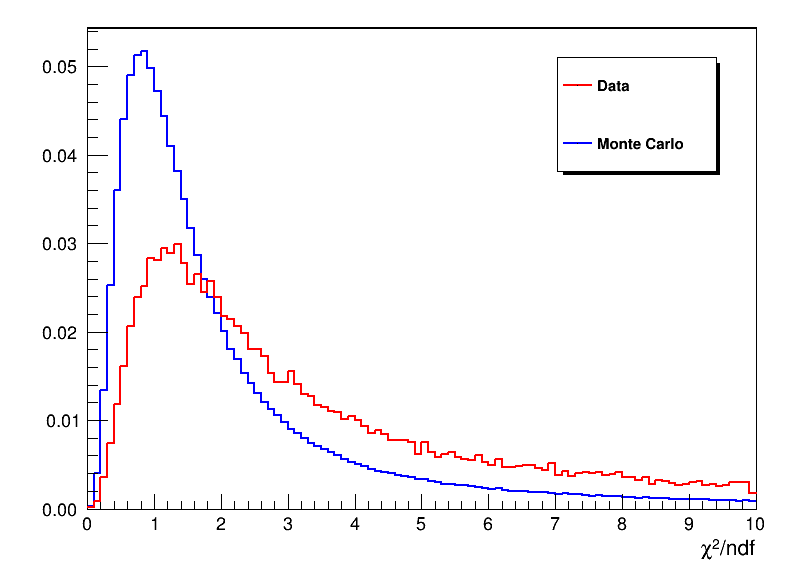

In [10]:
hist_chi2_data_pipkmks.Scale(1/hist_chi2_data_pipkmks.Integral())
hist_chi2_mc_pipkmks.Scale(1/hist_chi2_mc_pipkmks.Integral())

hist_chi2_data_pipkmks.SetLineColor(ROOT.kRed)
hist_chi2_data_pipkmks.SetFillColor(0)
hist_chi2_mc_pipkmks.SetLineColor(ROOT.kBlue)
hist_chi2_mc_pipkmks.SetFillColor(0)

hist_chi2_mc_pipkmks.GetXaxis().SetTitle('#chi^{2}/ndf')

hist_chi2_mc_pipkmks.Draw('hist')
hist_chi2_data_pipkmks.Draw('hist same')

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(hist_chi2_data_pipkmks.GetPtr(), 'Data', 'lpf')
legend.AddEntry(hist_chi2_mc_pipkmks.GetPtr(), 'Monte Carlo', 'lpf')
legend.Draw()

c.Draw()